# Problem Statement:
Build a multiple linear regression model for the prediction of demand for shared bikes

# DATA PREPARATION

In [76]:
#import libraries
import numpy as np
import pandas as pd

#Display the max rows/columns in the dataset
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

#Ignore warnings

import warnings

warnings.filterwarnings(action='ignore')

#import simplefilter(action='ignore', category=Warning)

# For visulaization importing below libraries
import seaborn as sns
import matplotlib.pyplot as plt

# For train-Test split method import below libraries

import sklearn
from sklearn.model_selection import train_test_split

# To use Scaling import  below libraries

from sklearn.preprocessing import MinMaxScaler

# To Build model using stats  following libraries to be imported 

import statsmodels
from statsmodels import api as sm

# To build VIF following libraries to be imported
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To use RFE we need sklearn linear regression too .Hence below libraries to be imported

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#For evaluation of test set import below libraries

from sklearn.metrics import r2_score

In [2]:
#Importing & Reading the csv file
Byke_demand = pd.read_csv("C:\\Users\\esusvem\\Downloads\\day.csv")
Byke_demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Inspecting the data frames
Byke_demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
Byke_demand.shape

(730, 16)

In [5]:
Byke_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#Checking Missing data 

In [6]:
#Checking if there are any nulls in the Columns : By default axis =0  
print(100*(round((Byke_demand.isnull().sum()),2)))

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
#Checking if there are any nulls in the rows :  axis =1
print(100*(round((Byke_demand.isnull().sum(axis=1)),2)))

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

#From the above analysis for the given data set there are no missing values, hence no imputation techniques will be used

#Inspecting whether the columns  data types are correct & dropping unused columns if required

In [8]:
Byke_demand

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [9]:
#Dropping columns that are not required for analysis purpose
Byke_demand.drop(columns=['instant','casual','registered','dteday'],axis=1,inplace=True)


In [10]:
Byke_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
#Checking the distict values for the columns, so that it can be converted into categorical variables or can be dropped if its biased

print(Byke_demand['season'].value_counts())
print(Byke_demand['weekday'].value_counts())
print(Byke_demand['mnth'].value_counts())
print(Byke_demand['weathersit'].value_counts())



3    188
2    184
1    180
4    178
Name: season, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [12]:
#Assigning the pre defined values to the columns accordingly

Byke_demand['season']=Byke_demand['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
Byke_demand['mnth']=Byke_demand['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct'
                                         ,11:'Nov',12:'Dec'})
Byke_demand['weekday']=Byke_demand['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})
Byke_demand['weathersit']=Byke_demand['weathersit'].map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                        2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                        3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                        4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})


In [13]:
Byke_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [14]:
Byke_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
# Check the multicollinearity using corr()
Byke_demand.corr(method='pearson')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [16]:
Byke_demand.shape

(730, 12)

In [17]:
# Check the multicollinearity using corr()
Byke_demand.corr(method='pearson')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [18]:
Byke_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<function matplotlib.pyplot.show(*args, **kw)>

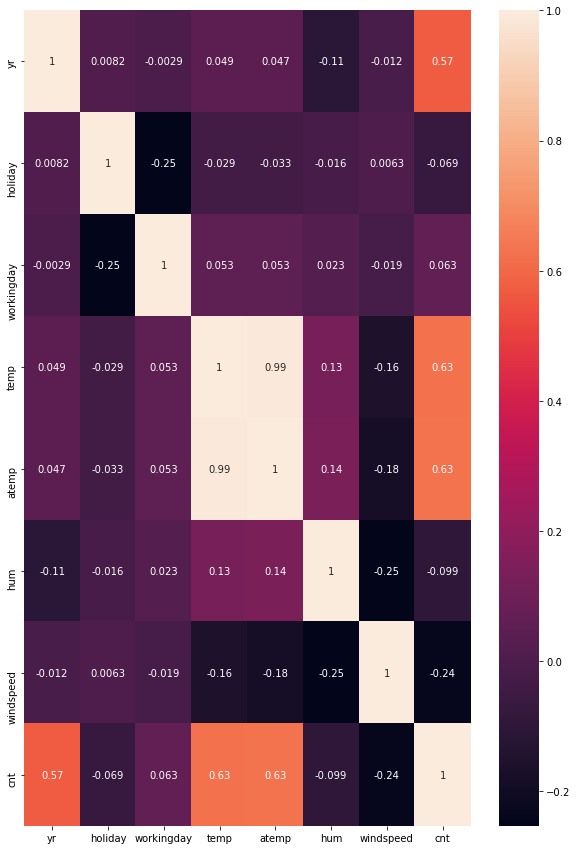

In [19]:
plt.figure(figsize=(10,15))
sns.heatmap(Byke_demand.corr(),annot=True)
plt.show

In [20]:
# temp & atemp both columns are almost same wrt collinearity , hence we can drop one column y
#From the above  analysis we will drop  temp 

Byke_demand.drop('temp',inplace=True,axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

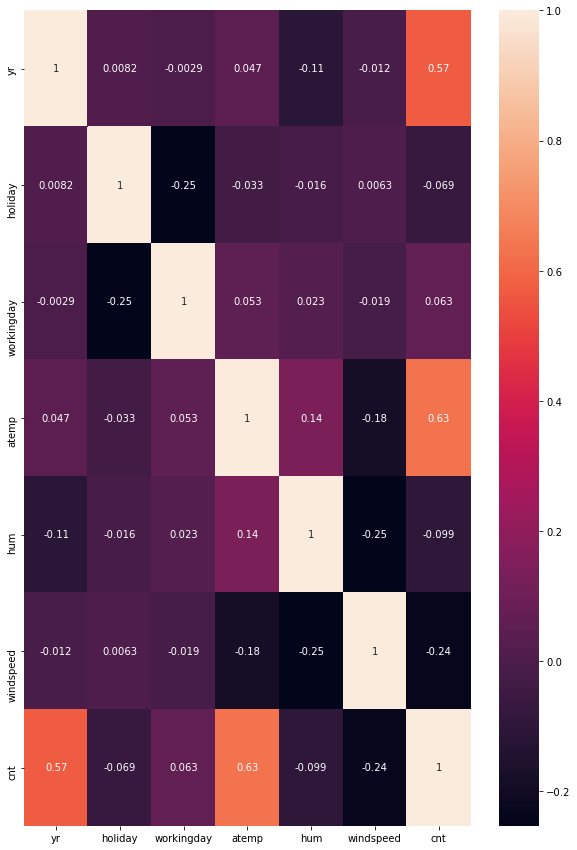

In [21]:
plt.figure(figsize=(10,15))
sns.heatmap(Byke_demand.corr(),annot=True)
plt.show

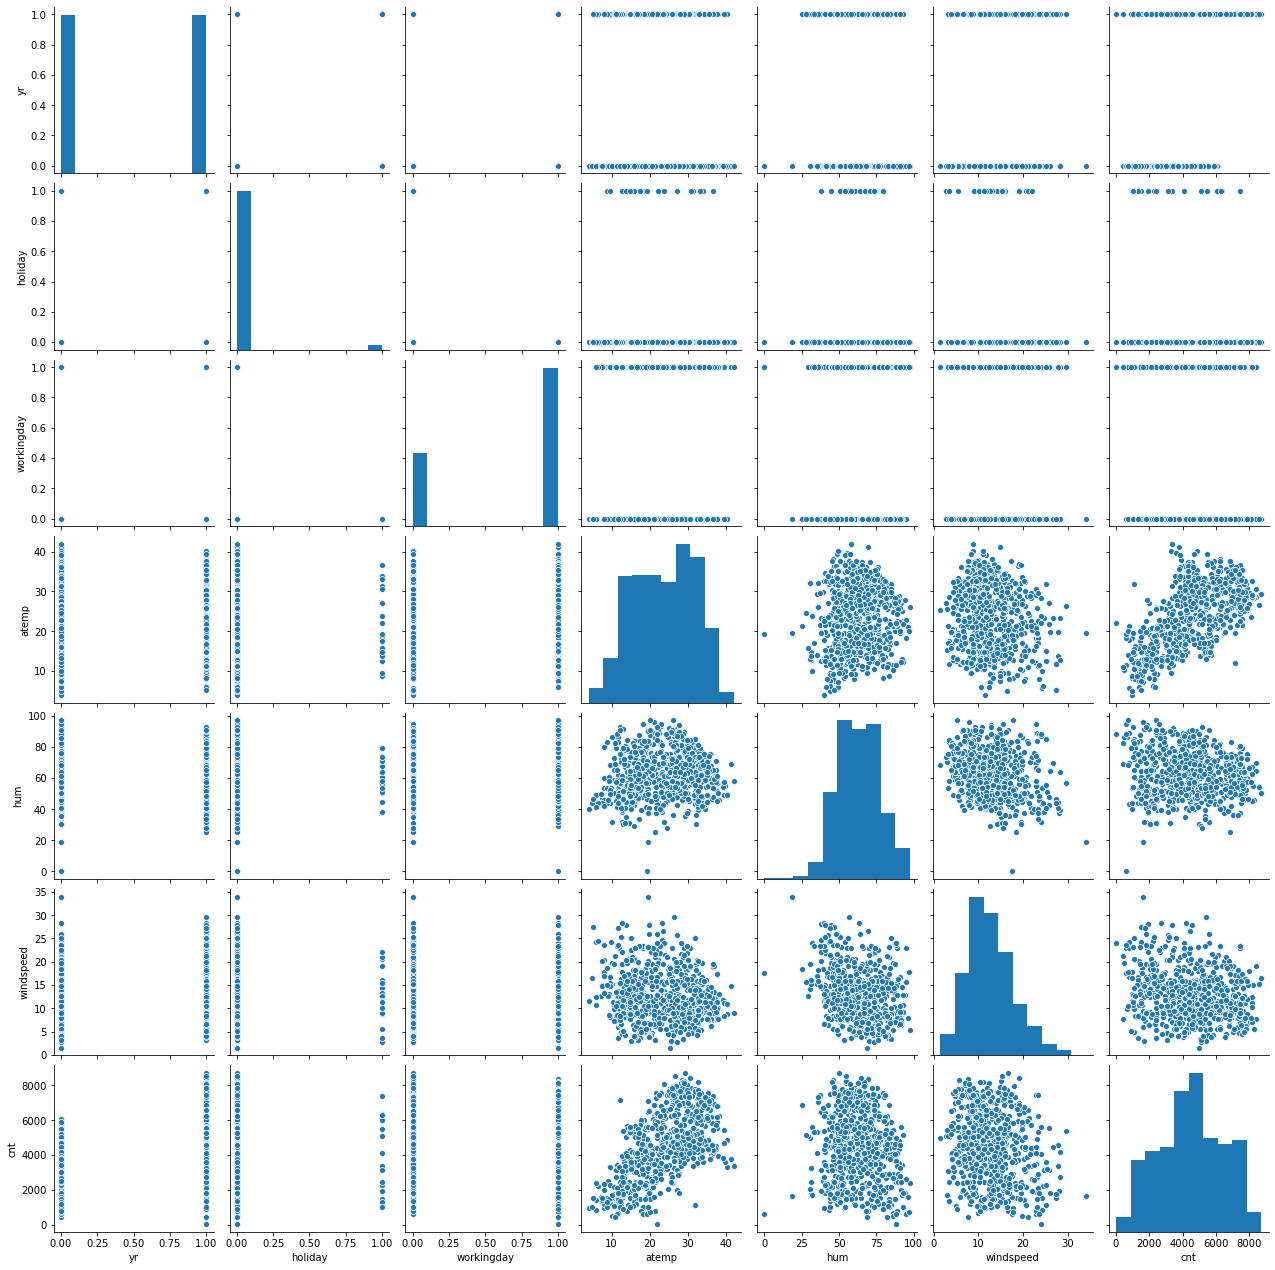

In [22]:
# Also we can check the collinearity using pair scatter plots
sns.pairplot(Byke_demand)

In [23]:
# Creating dummy variables for the object type data types
Byke_demand_season=pd.get_dummies(Byke_demand['season'],drop_first=True)
Byke_demand_weekday=pd.get_dummies(Byke_demand['weekday'],drop_first=True)
Byke_demand_mnth=pd.get_dummies(Byke_demand['mnth'],drop_first=True)
Byke_demand_weathersit=pd.get_dummies(Byke_demand['weathersit'],drop_first=True)

In [24]:
#Merging the  created data frames to the original data frame by using concat ()

Byke_demand=pd.concat([Byke_demand,Byke_demand_season] ,axis=1)
Byke_demand=pd.concat([Byke_demand,Byke_demand_mnth] ,axis=1)
Byke_demand=pd.concat([Byke_demand,Byke_demand_weekday] ,axis=1)
Byke_demand=pd.concat([Byke_demand,Byke_demand_weathersit] ,axis=1)

In [25]:
# Dropping redudanct columns from the original data frame

Byke_demand.drop(columns=['season','weekday','mnth','weathersit'],axis=1,inplace=True)

In [26]:

Byke_demand.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building

In [27]:
# Copying the byke_demand dataframe
Byke_demand_cp= Byke_demand.copy()
Byke_demand_cp.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
X=Byke_demand_cp
y=Byke_demand_cp.pop('cnt')


In [29]:
X.shape


(730, 28)

In [30]:
# Splitting into train-test split method

X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=200)


In [31]:
print('Byke_demand original dataframe',Byke_demand.shape)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


Byke_demand original dataframe (730, 29)
X_train (510, 28)
X_test (220, 28)
y_train (510,)
y_test (220,)


# Scaling 
we have two trypes of scaling methods

a)Min-Max Scaling -Normalization(Min=0 & Max=1, (x-xmin/xmax-xmin))
b) Standardization( Mean=0 and standard deviation =1 , (mu-Mean/sigma))

In [32]:
#Instantiate an object
scaler=MinMaxScaler()
# We donot have to scale the dummy variables as the values already lie between 0 & 1 ,Only Numeric values will be scaled
X_train_num=['windspeed','hum','atemp','workingday','holiday','yr']

# Fit_tranform the numeric variables
X_train[X_train_num]=scaler.fit_transform(X_train[X_train_num])

X_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.688235,0.526213,0.649415,0.350175,0.250980,0.260784,0.247059,0.074510,0.084314,0.074510,0.092157,0.084314,0.094118,0.086275,0.088235,0.088235,0.084314,0.072549,0.154902,0.145098,0.133333,0.139216,0.154902,0.129412,0.021569,0.337255
std,0.500352,0.179682,0.463669,0.215512,0.146352,0.161806,0.434003,0.439494,0.431725,0.262857,0.278131,0.262857,0.289531,0.278131,0.292279,0.281045,0.283915,0.283915,0.278131,0.259649,0.362166,0.352545,0.340268,0.346511,0.362166,0.335985,0.145413,0.473237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.345674,0.542353,0.234958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.543406,0.647488,0.330767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.707735,0.756118,0.438134,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
56,0.0,0.0,0.0,0.271808,0.554315,0.338464,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13,0.0,0.0,1.0,0.146318,0.554222,0.214724,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120,0.0,0.0,0.0,0.493957,0.785315,0.173093,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
252,0.0,0.0,0.0,0.707736,0.776728,0.270509,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
636,1.0,0.0,0.0,0.603808,0.559468,0.423056,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


# Train Model
Building a model  can be done via stats model or  the sklearn.
The stats model doesnt have constant (intercept) , for which explicitly needs to be added while building model
But for Sklearn its not required.
However statsmodel summary provides different metrics but sklearn only provides the intercept of the predicted variables.

#Multi correlation can be checked through  heat map or pair plots however with these two we would be getting
multi correlations between two variables.To avoid this problem we have few approaches as below which can be used for checking collinearity and can be used to deal with the problem.
#a) Top to bottom approach,b) step wise approach ,c) bottom approach.Howevr these all are all manual approaching which would be 
time consuming and if many variables impossible to .Hence an automated apprach is intrOduced which is called
RFE (Recursive feature elimination).
The RFE will be used with the manual approach . 

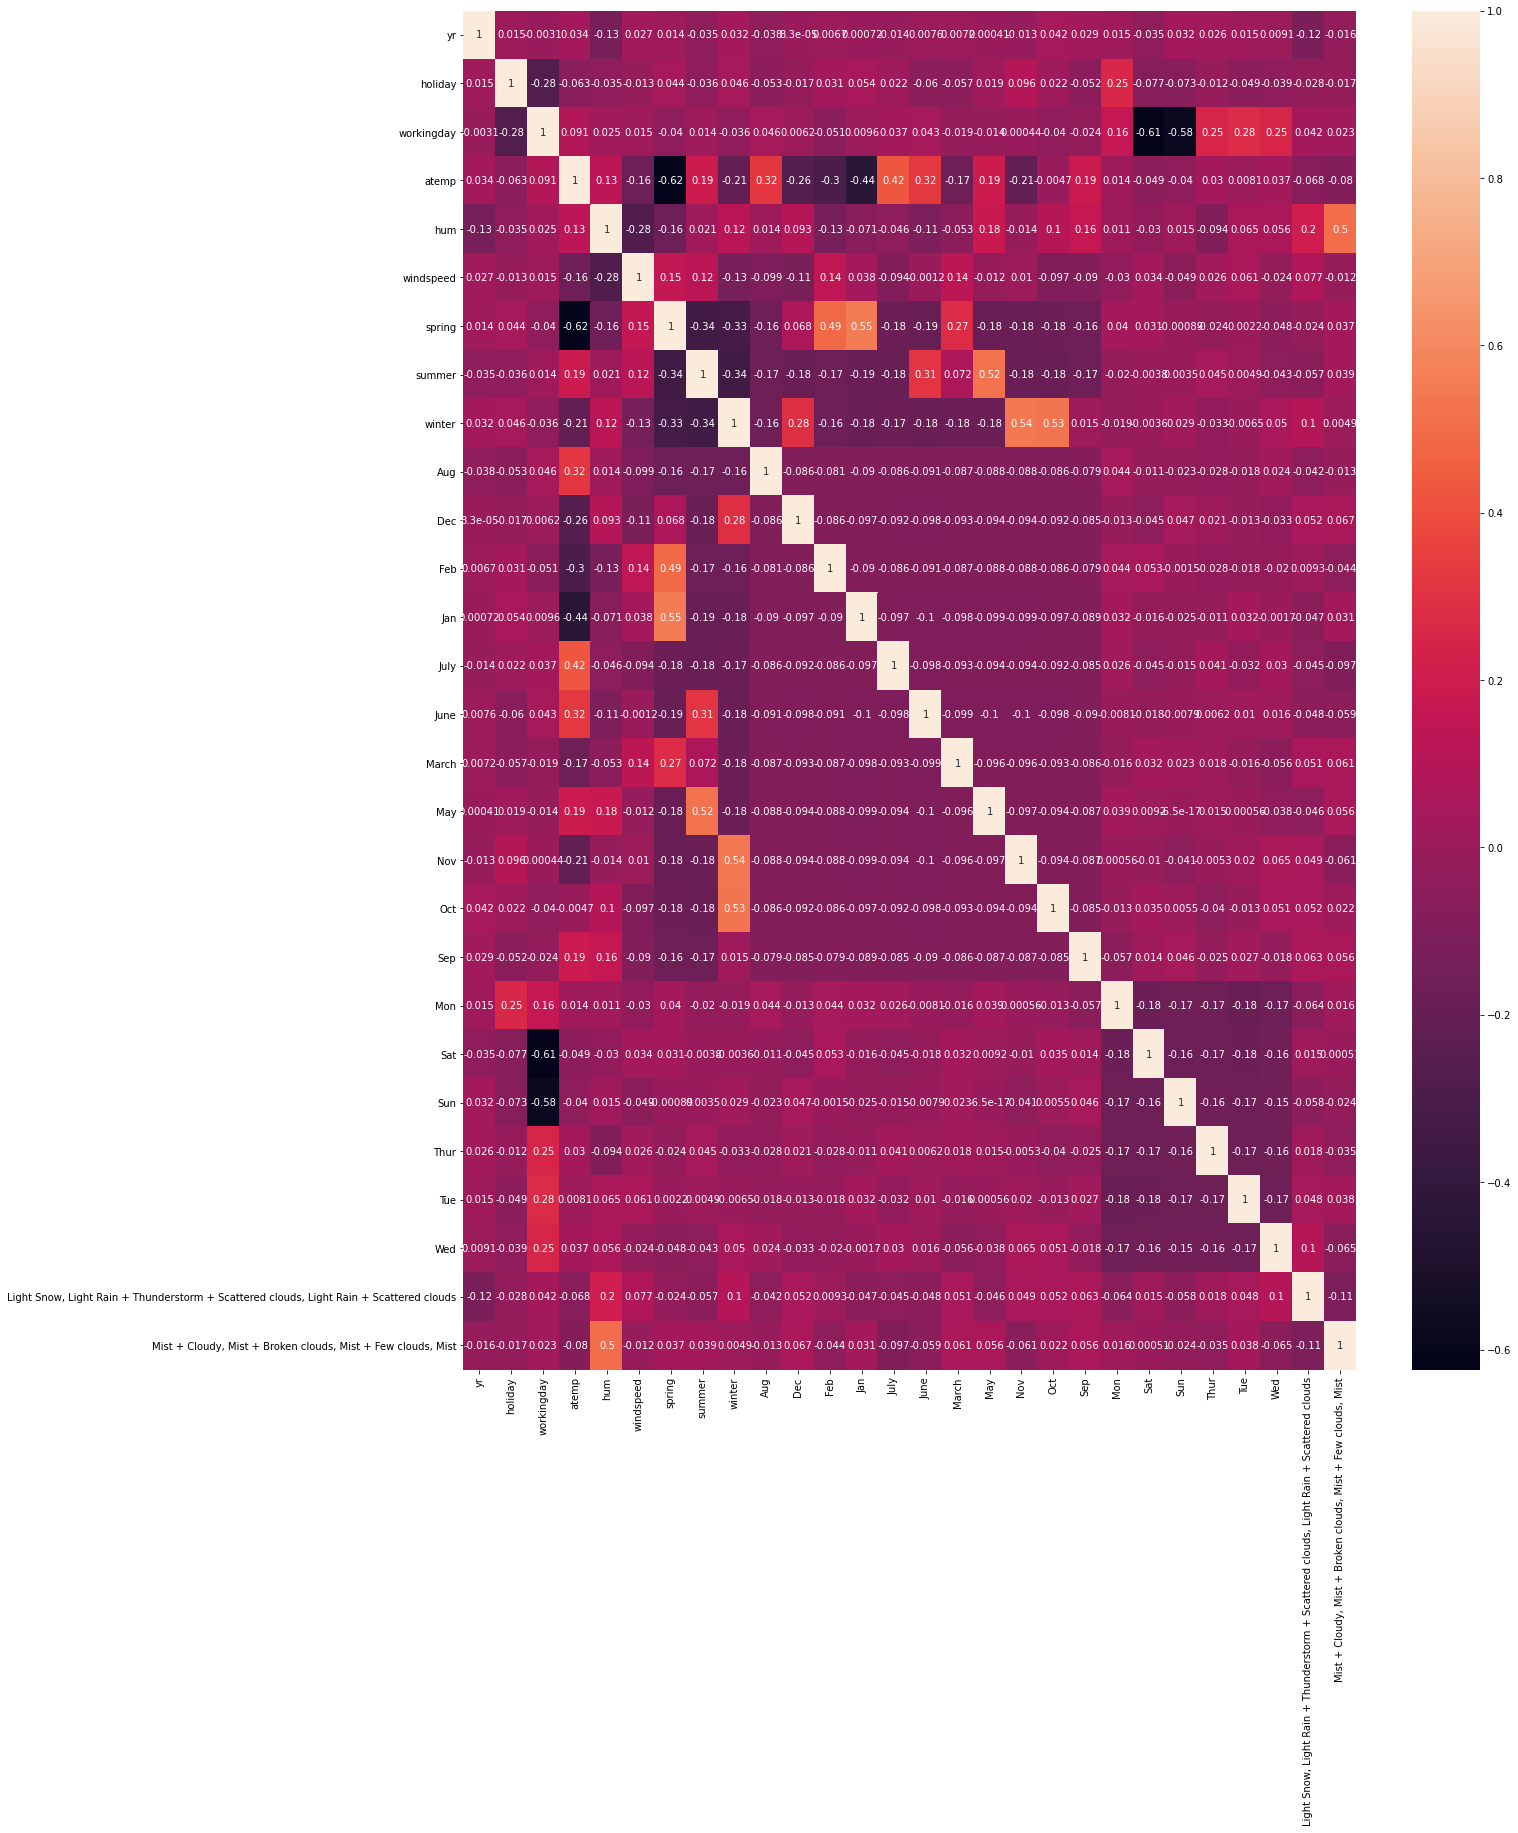

In [34]:
plt.figure(figsize=(20,25))
sns.heatmap(X_train.corr(),annot=True)

# 1)Top to bottom Approach
#From the above heatmap we see that Jan, spring has the highest correlation hence we start using the Manual Top to bottom approach 

In [35]:
 # Using stats model 
#Add constant
X_train_sm=sm.add_constant(X_train['spring']) 

#Create first model
MLR=sm.OLS(y_train,X_train_sm)

#fit the model
MLR_model=MLR.fit()
    
#To check the parameters i.e. coefficient and constant(intercept)    
MLR_model.params

#To check complete summary
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.40e-43
Time:                        23:35:56   Log-Likelihood:                -4486.7
No. Observations:                 510   AIC:                             8977.
Df Residuals:                     508   BIC:                             8986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5122.5995     82.086     62.405      0.000    4961.330    5283.869
spring     -2501.3182    163.851    -15.266      0.000   -2823.227   -2179.409
==============================================================================
Omnibus:                        2.459   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.113
Skew:                           0.044   Prob(JB):                        0.348
Kurtosis:                       2.697   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#From the heat map , winter  shows the next high multi collinearity lets add winter

X_train_sm=sm.add_constant(X_train[['spring','winter']])
MLR=sm.OLS(y_train,X_train_sm).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           8.08e-44
Time:                        23:35:56   Log-Likelihood:                -4483.2
No. Observations:                 510   AIC:                             8972.
Df Residuals:                     507   BIC:                             8985.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5274.7500     99.679     52.917      0.000    5078.915    5470.585
spring     -2653.4688    172.649    -15.369      0.000   -2992.665   -2314.273
winter      -461.2817    173.560     -2.658      0.008    -802.268    -120.296
==============================================================================
Omnibus:                        1.981   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.863
Skew:                           0.071   Prob(JB):                        0.394
Kurtosis:                       2.740   Cond. No.                         3.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#From the above summary we see that the  R squared has increased ,P value is still under 0.05 with low prob(F statistic ) score  which is less that 0.02 and like this we can so on add variables and check the parameters value

# 2)Bottom up Approach
Adding all the variables togethers and dropping one by one by checking below two params
a)p value
b)VIF value(Variance inflation factor):- Which shows the correlation between all the dependant variables

In [37]:
X_train_sm=sm.add_constant(X_train)
MLR=sm.OLS(y_train,X_train_sm).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.25e-187
Time:                        23:35:56   Log-Likelihood:                -4079.2
No. Observations:                 510   AIC:                             8214.
Df Residuals:                     482   BIC:                             8333.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2312.4107    297.327      7.777      0.000    1728.193    2896.628
yr                                                                                       2024.7526     67.859     29.837      0.000    1891.416    2158.089
holiday                                                                                   250.1612    175.410      1.426      0.154     -94.501     594.824
workingday                                                                                839.9056    102.552      8.190      0.000     638.401    1041.410
atemp                                                                                    4162.5161    376.240     11.063      0.000    3423.244    4901.789
hum                                                                                     -1701.4058    321.074     -5.299      0.000   -2332.283   -1070.528
windspeed                                                                               -1370.2252    228.300     -6.002      0.000   -1818.812    -921.639
spring                                                                                   -550.5225    246.883     -2.230      0.026   -1035.622     -65.423
summer                                                                                    281.4292    206.598      1.362      0.174    -124.515     687.373
winter                                                                                   1088.6560    228.766      4.759      0.000     639.154    1538.158
Aug                                                                                        73.8356    277.531      0.266      0.790    -471.484     619.155
Dec                                                                                      -600.1442    281.577     -2.131      0.034   -1153.414     -46.875
Feb                                                                                      -258.1771    277.357     -0.931      0.352    -803.155     286.801
Jan                                                                                      -401.4196    282.336     -1.422      0.156    -956.181     153.342
July                                                                                     -144.4223    279.959     -0.516      0.606    -694.513     405.668
June                                                                                       61.0323    192.152      0.318      0.751    -316.527     438.591
March                                                                                     119.8800    213.446      0.56

 # VIF 

In [38]:
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range (X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,workingday,90.31
21,Sat,18.96
22,Sun,17.83
6,spring,10.65
8,winter,9.05
7,summer,7.65
17,Nov,6.92
18,Oct,6.41
12,Jan,6.20
3,atemp,6.10


#from the above summary stats and VIF value we can see that in P value Oct has the highest value and in VIF working day.
Hence lets remove the coefficient which has high p value and recheck the same.

In [39]:
X_train_sm.drop(columns=['Oct'],axis=1,inplace=True)

In [40]:
# Building the model again with the  dropped variable
X_train_sm=sm.add_constant(X_train_sm)
MLR=sm.OLS(y_train, X_train_sm).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.16e-188
Time:                        23:35:57   Log-Likelihood:                -4079.2
No. Observations:                 510   AIC:                             8212.
Df Residuals:                     483   BIC:                             8327.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2318.3866    278.967      8.311      0.000    1770.247    2866.526
yr                                                                                       2024.8268     67.777     29.875      0.000    1891.652    2158.002
holiday                                                                                   251.8850    172.742      1.458      0.145     -87.535     591.304
workingday                                                                                841.2716     99.759      8.433      0.000     645.256    1037.287
atemp                                                                                    4161.1004    375.074     11.094      0.000    3424.122    4898.079
hum                                                                                     -1699.1666    318.458     -5.336      0.000   -2324.902   -1073.431
windspeed                                                                               -1371.0335    227.647     -6.023      0.000   -1818.334    -923.733
spring                                                                                   -549.6093    246.135     -2.233      0.026   -1033.237     -65.981
summer                                                                                    276.4413    188.017      1.470      0.142     -92.991     645.873
winter                                                                                   1095.5310    196.120      5.586      0.000     710.177    1480.885
Aug                                                                                        66.1718    244.463      0.271      0.787    -414.170     546.513
Dec                                                                                      -613.2668    170.231     -3.603      0.000    -947.752    -278.782
Feb                                                                                      -267.1699    230.694     -1.158      0.247    -720.458     186.118
Jan                                                                                      -410.6309    234.185     -1.753      0.080    -870.778      49.517
July                                                                                     -151.9670    248.275     -0.612      0.541    -639.800     335.866
June                                                                                       56.9324    178.750      0.319      0.750    -294.292     408.157
March                                                                                     113.1442    179.594      0.63

In [41]:
#VIF

vif=pd.DataFrame()
vif['features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif



,features,VIF
2,holiday,90.314082
21,Sat,18.958926
22,Sun,17.830065
6,windspeed,10.649339
8,summer,9.048022
7,spring,7.647389
17,May,6.918979
18,Nov,6.413056
12,Feb,6.198389
3,workingday,6.098569


#From the above we can see that after removing the Oct Variable ,many Coeff are changes wrt for variables.
So.. on we can do this apprach till we get acheive the best Rsquare ,p value, adj R swuare,Prob(F statistics).
However these both Manual approach models are time consuming and with many columns it will become impossible to do.Hence we have an automated apprach called RFE (Recursive automation feature).
RFE feature is used along with manual approach to acheive best results.

# 3)RFE -Recursive Feature Elimination

In [42]:
#instantiate an object
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,15)        # 15 output variables 
rfe=rfe.fit(X_train,y_train)

In [43]:
#We can check what all the output variables selected by RFE

list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', False, 5),
 ('June', False, 13),
 ('March', False, 9),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', False, 2)]

In [44]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Nov', 'Sep', 'Sat', 'Sun',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Oct', 'Mon',
       'Thur', 'Tue', 'Wed',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [46]:
X_train_rfe=X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Dec,Nov,Sep,Sat,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,0.0,0.0,0.0,0.271808,0.554315,0.338464,1,0,0,0,0,0,1,0,0
13,0.0,0.0,1.0,0.146318,0.554222,0.214724,1,0,0,0,0,0,0,0,0
120,0.0,0.0,0.0,0.493957,0.785315,0.173093,0,1,0,0,0,0,0,1,0
252,0.0,0.0,0.0,0.707736,0.776728,0.270509,0,0,0,0,0,1,1,0,0
636,1.0,0.0,0.0,0.603808,0.559468,0.423056,0,0,1,0,0,1,1,0,0


In [47]:
# Using the supported columns output of RFE as input to the stats model
X_train_sm=sm.add_constant(X_train_rfe)
rfe_sm= sm.OLS(y_train,X_train_sm).fit()
rfe_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.19e-193
Time:                        23:35:57   Log-Likelihood:                -4099.9
No. Observations:                 510   AIC:                             8230.
Df Residuals:                     495   BIC:                             8293.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2332.8131    240.836      9.686      0.000    1859.626    2806.000
yr                                                                                       2000.9524     69.069     28.971      0.000    1865.249    2136.656
holiday                                                                                   100.4074    162.455      0.618      0.537    -218.778     419.593
workingday                                                                                786.9358     83.524      9.422      0.000     622.831     951.041
atemp                                                                                    4668.8806    291.491     16.017      0.000    4096.169    5241.592
hum                                                                                     -2593.7807    256.353    -10.118      0.000   -3097.454   -2090.107
windspeed                                                                               -1546.9983    227.596     -6.797      0.000   -1994.171   -1099.825
spring                                                                                   -570.1003    170.824     -3.337      0.001    -905.730    -234.471
summer                                                                                    467.6193    114.869      4.071      0.000     241.928     693.311
winter                                                                                   1190.5746    141.546      8.411      0.000     912.470    1468.679
Dec                                                                                      -466.2601    141.444     -3.296      0.001    -744.165    -188.355
Nov                                                                                      -572.9512    157.224     -3.644      0.000    -881.860    -264.042
Sep                                                                                       683.6108    143.019      4.780      0.000     402.612     964.610
Sat                                                                                       946.9316    100.678      9.406      0.000     749.123    1144.740
Sun                                                                                       498.5383    103.458      4.819      0.000     295.267     701.810
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1258.5804    243.555     -5.168      0.000   -1737.110    -780.051
==============================================================================
Omnibus:                       77.113   

In [48]:
#VIF
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,workingday,54.96
12,Sat,12.03
13,Sun,11.19
6,spring,4.83
1,holiday,3.57
3,atemp,3.47
8,winter,3.28
7,summer,2.24
10,Nov,1.75
9,Dec,1.36


#From the p value and VIF value we see that holiday p value is high , hence we drop that column 

In [49]:
X_train_rfe.drop(columns='holiday',axis=1,inplace=True)
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,spring,summer,winter,Dec,Nov,Sep,Sat,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,0.0,0.0,0.271808,0.554315,0.338464,1,0,0,0,0,0,1,0,0
13,0.0,1.0,0.146318,0.554222,0.214724,1,0,0,0,0,0,0,0,0
120,0.0,0.0,0.493957,0.785315,0.173093,0,1,0,0,0,0,0,1,0
252,0.0,0.0,0.707736,0.776728,0.270509,0,0,0,0,0,1,1,0,0
636,1.0,0.0,0.603808,0.559468,0.423056,0,0,1,0,0,1,1,0,0


In [50]:
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm_1=sm.OLS(y_train,X_train_rfe).fit()
X_train_sm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1338.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:35:58   Log-Likelihood:                         -4123.8
No. Observations:                 510   AIC:                                      8276.
Df Residuals:                     496   BIC:                                      8335.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
yr                                                                                       2043.3320     72.025     28.370      0.000    1901.820    2184.844
workingday                                                                               1360.0501    172.112      7.902      0.000    1021.892    1698.208
atemp                                                                                    5892.8901    243.566     24.194      0.000    5414.341    6371.439
hum                                                                                     -1800.2724    240.456     -7.487      0.000   -2272.709   -1327.835
windspeed                                                                                -985.6116    222.847     -4.423      0.000   -1423.452    -547.771
spring                                                                                    116.2430    146.133      0.795      0.427    -170.873     403.359
summer                                                                                    751.7177    112.429      6.686      0.000     530.822     972.614
winter                                                                                   1578.9359    136.218     11.591      0.000    1311.300    1846.572
Dec                                                                                      -334.8690    146.753     -2.282      0.023    -623.204     -46.534
Nov                                                                                      -339.0995    160.803     -2.109      0.035    -655.038     -23.161
Sep                                                                                       744.4737    149.443      4.982      0.000     450.854    1038.093
Sat                                                                                      1547.4267    188.535      8.208      0.000    1177.000    1917.853
Sun                                                                                      1095.5369    191.293      5.727      0.000     719.692    1471.382
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1388.6993    254.221     -5.463      0.000   -1888.182    -889.216
==============================================================================
Omnibus:                       63.216   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.100
Skew:                          -0.707   Prob(JB):                     1.53e-28
Kurtosis:       

#From the above summary we can see all the p values are in permissible limit with good R square and adjusted R square values.
Lets check VIF too

In [51]:
# VIF

vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,20.57
1,workingday,16.37
2,atemp,15.40
4,windspeed,5.93
5,spring,4.30
11,Sat,4.14
12,Sun,3.92
7,winter,3.68
6,summer,2.65
0,yr,2.03


#From the above VIF values we can see that hum value has the highest VIF value.Hence re itering the same step of p value 

In [52]:
#Removing the hum variable

X_train_rfe.drop(columns='hum',inplace=True,axis=1)
X_train_rfe.head()

,yr,workingday,atemp,windspeed,spring,summer,winter,Dec,Nov,Sep,Sat,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,0.0,0.0,0.271808,0.338464,1,0,0,0,0,0,1,0,0
13,0.0,1.0,0.146318,0.214724,1,0,0,0,0,0,0,0,0
120,0.0,0.0,0.493957,0.173093,0,1,0,0,0,0,0,1,0
252,0.0,0.0,0.707736,0.270509,0,0,0,0,0,1,1,0,0
636,1.0,0.0,0.603808,0.423056,0,0,1,0,0,1,1,0,0


In [53]:
X_train_rfe.shape


(510, 13)

In [54]:
#P value
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm_2=sm.OLS(y_train,X_train_sm).fit()
X_train_sm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.06e-174
Time:                        23:35:58   Log-Likelihood:                -4147.9
No. Observations:                 510   AIC:                             8324.
Df Residuals:                     496   BIC:                             8383.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     864.7589    343.249      2.519      0.012     190.358    1539.160
yr                                                                                       2088.7704     75.198     27.777      0.000    1941.025    2236.516
workingday                                                                                644.9069    209.232      3.082      0.002     233.817    1055.997
atemp                                                                                    4322.6337    317.683     13.607      0.000    3698.464    4946.803
windspeed                                                                                -936.5903    240.839     -3.889      0.000   -1409.781    -463.400
spring                                                                                   -702.6213    186.918     -3.759      0.000   -1069.870    -335.373
summer                                                                                    311.9563    124.927      2.497      0.013      66.505     557.407
winter                                                                                   1011.6050    154.121      6.564      0.000     708.794    1314.416
Dec                                                                                      -575.3154    154.776     -3.717      0.000    -879.413    -271.218
Nov                                                                                      -560.0941    172.539     -3.246      0.001    -899.092    -221.097
Sep                                                                                       471.0021    155.252      3.034      0.003     165.970     776.035
Sat                                                                                       827.5671    226.354      3.656      0.000     382.836    1272.298
Sun                                                                                       352.5064    228.574      1.542      0.124     -96.586     801.599
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1785.7092    261.102     -6.839      0.000   -2298.711   -1272.708
==============================================================================
Omnibus:                       93.277   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.263
Skew:                          -0.941   Prob(JB):                     5.45e-49
Kurtosis:                       5.630   Cond. No.                         21.3
====================================

In [55]:
#VIF value
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,workingday,14.70
2,atemp,10.94
3,windspeed,5.83
10,Sat,3.80
11,Sun,3.57
4,spring,3.41
6,winter,3.19
5,summer,2.33
0,yr,2.01
8,Nov,1.81


#Dropping workingday due to high value

In [56]:
X_train_rfe.drop(columns='workingday',inplace=True,axis=1)
X_train_rfe

,yr,atemp,windspeed,spring,summer,winter,Dec,Nov,Sep,Sat,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,0.0,0.271808,0.338464,1,0,0,0,0,0,1,0,0
13,0.0,0.146318,0.214724,1,0,0,0,0,0,0,0,0
120,0.0,0.493957,0.173093,0,1,0,0,0,0,0,1,0
252,0.0,0.707736,0.270509,0,0,0,0,0,1,1,0,0
636,1.0,0.603808,0.423056,0,0,1,0,0,1,1,0,0
622,1.0,0.678170,0.464116,0,0,0,0,0,1,1,0,0
344,0.0,0.232951,0.091018,0,0,1,1,0,0,0,1,0
334,0.0,0.303070,0.407706,0,0,1,1,0,0,0,0,0
422,1.0,0.373189,0.506402,1,0,0,0,0,0,0,0,0
32,0.0,0.234641,0.498723,1,0,0,0,0,0,0,0,0


In [57]:
#P value
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm_3=sm.OLS(y_train,X_train_sm).fit()
X_train_sm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.40e-173
Time:                        23:35:58   Log-Likelihood:                -4152.7
No. Observations:                 510   AIC:                             8331.
Df Residuals:                     497   BIC:                             8386.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    1474.5156    282.895      5.212      0.000     918.698    2030.333
yr                                                                                       2085.7162     75.832     27.505      0.000    1936.726    2234.706
atemp                                                                                    4334.5704    320.364     13.530      0.000    3705.136    4964.005
windspeed                                                                                -915.9463    242.796     -3.772      0.000   -1392.979    -438.914
spring                                                                                   -718.5600    188.438     -3.813      0.000   -1088.792    -348.328
summer                                                                                    310.4208    125.990      2.464      0.014      62.883     557.959
winter                                                                                   1003.5012    155.411      6.457      0.000     698.158    1308.844
Dec                                                                                      -562.3480    156.036     -3.604      0.000    -868.920    -255.776
Nov                                                                                      -592.3792    173.687     -3.411      0.001    -933.631    -251.127
Sep                                                                                       484.0214    156.516      3.092      0.002     176.507     791.536
Sat                                                                                       212.7799    107.925      1.972      0.049       0.734     424.826
Sun                                                                                      -262.7782    112.291     -2.340      0.020    -483.402     -42.154
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1761.2335    263.203     -6.692      0.000   -2278.362   -1244.105
==============================================================================
Omnibus:                       97.041   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.475
Skew:                          -0.985   Prob(JB):                     6.63e-50
Kurtosis:                       5.603   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#VIF value
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,windspeed,5.51
1,atemp,4.15
5,winter,2.71
3,spring,2.13
0,yr,2.01
4,summer,2.01
7,Nov,1.80
6,Dec,1.38
8,Sep,1.23
9,Sat,1.20


#Dropping windspeed due to high value

In [59]:
X_train_rfe.drop(columns='windspeed',inplace=True,axis=1)
X_train_rfe.head()

,yr,atemp,spring,summer,winter,Dec,Nov,Sep,Sat,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,0.0,0.271808,1,0,0,0,0,0,1,0,0
13,0.0,0.146318,1,0,0,0,0,0,0,0,0
120,0.0,0.493957,0,1,0,0,0,0,0,1,0
252,0.0,0.707736,0,0,0,0,0,1,1,0,0
636,1.0,0.603808,0,0,1,0,0,1,1,0,0


In [60]:
#P value
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm_4=sm.OLS(y_train,X_train_sm).fit()
X_train_sm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.82e-171
Time:                        23:35:58   Log-Likelihood:                -4159.9
No. Observations:                 510   AIC:                             8344.
Df Residuals:                     498   BIC:                             8395.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    1096.4646    268.042      4.091      0.000     569.832    1623.097
yr                                                                                       2069.2325     76.705     26.977      0.000    1918.527    2219.938
atemp                                                                                    4463.8909    322.729     13.832      0.000    3829.813    5097.968
spring                                                                                   -736.1538    190.866     -3.857      0.000   -1111.156    -361.152
summer                                                                                    266.6192    127.109      2.098      0.036      16.883     516.355
winter                                                                                   1042.8684    157.107      6.638      0.000     734.195    1351.542
Dec                                                                                      -504.4112    157.328     -3.206      0.001    -813.520    -195.303
Nov                                                                                      -617.5631    175.850     -3.512      0.000    -963.062    -272.065
Sep                                                                                       503.3387    158.497      3.176      0.002     191.934     814.743
Sat                                                                                       207.0497    109.339      1.894      0.059      -7.772     421.872
Sun                                                                                      -245.7776    113.682     -2.162      0.031    -469.132     -22.423
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1857.6622    265.416     -6.999      0.000   -2379.136   -1336.188
==============================================================================
Omnibus:                       96.161   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.333
Skew:                          -0.970   Prob(JB):                     2.62e-50
Kurtosis:                       5.642   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#From the above p value sat has the high value which is more that 0.05 so need to drop the column

In [61]:
#VIF value
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,atemp,2.89
4,winter,2.60
0,yr,2.00
6,Nov,1.76
3,summer,1.72
2,spring,1.41
5,Dec,1.38
7,Sep,1.23
8,Sat,1.20
9,Sun,1.19


In [62]:
#From the high p value of sat dropping the columns
X_train_rfe.drop(columns='Sat',inplace=True,axis=1)
X_train_rfe.head()

,yr,atemp,spring,summer,winter,Dec,Nov,Sep,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,0.0,0.271808,1,0,0,0,0,0,0,0
13,0.0,0.146318,1,0,0,0,0,0,0,0
120,0.0,0.493957,0,1,0,0,0,0,1,0
252,0.0,0.707736,0,0,0,0,0,1,0,0
636,1.0,0.603808,0,0,1,0,0,1,0,0


In [63]:
#P value
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm_5=sm.OLS(y_train,X_train_sm).fit()
X_train_sm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.24e-172
Time:                        23:35:58   Log-Likelihood:                -4161.7
No. Observations:                 510   AIC:                             8345.
Df Residuals:                     499   BIC:                             8392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    1156.4310    266.854      4.334      0.000     632.136    1680.726
yr                                                                                       2065.1331     76.873     26.864      0.000    1914.099    2216.167
atemp                                                                                    4427.1475    322.978     13.707      0.000    3792.582    5061.713
spring                                                                                   -742.2519    191.333     -3.879      0.000   -1118.169    -366.335
summer                                                                                    264.8577    127.435      2.078      0.038      14.483     515.232
winter                                                                                   1046.1867    157.503      6.642      0.000     736.735    1355.638
Dec                                                                                      -523.9906    157.394     -3.329      0.001    -833.227    -214.754
Nov                                                                                      -634.0622    176.088     -3.601      0.000    -980.028    -288.097
Sep                                                                                       509.7029    158.871      3.208      0.001     197.564     821.842
Sun                                                                                      -281.3532    112.409     -2.503      0.013    -502.206     -60.500
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1859.0164    266.102     -6.986      0.000   -2381.835   -1336.198
==============================================================================
Omnibus:                       90.011   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.696
Skew:                          -0.908   Prob(JB):                     1.45e-47
Kurtosis:                       5.618   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#VIF
#VIF value
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,atemp,2.83
4,winter,2.57
0,yr,2.00
6,Nov,1.76
3,summer,1.71
5,Dec,1.38
2,spring,1.36
7,Sep,1.22
8,Sun,1.16
9,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.05


#From the p values and VIF all values are under permissible limit.
After building model now the final R Square is 80.8 and adjusted R square is 80.4 , prob(F statistics) is very less 7.24e-172.
The final model has 10  predicted variables.

# Residual Analysis

In [65]:
X_train_sm.head()

,const,yr,atemp,spring,summer,winter,Dec,Nov,Sep,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
56,1.0,0.0,0.271808,1,0,0,0,0,0,0,0
13,1.0,0.0,0.146318,1,0,0,0,0,0,0,0
120,1.0,0.0,0.493957,0,1,0,0,0,0,1,0
252,1.0,0.0,0.707736,0,0,0,0,0,1,0,0
636,1.0,1.0,0.603808,0,0,1,0,0,1,0,0


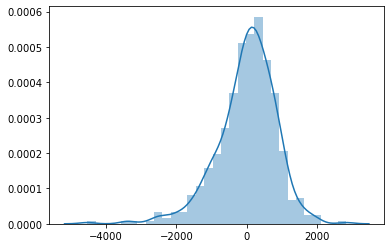

In [66]:
y_train_pred= X_train_sm_5.predict(X_train_sm)
Res=y_train-y_train_pred
sns.distplot(Res)

# Evaluate the Test model

#Perform the same pre requisites done on the train model

In [67]:
# Scaling

# We donot have to scale the dummy variables as the values already lie between 0 & 1 ,Only Numeric values will be scaled
X_test_num=['windspeed','hum','atemp','workingday','holiday','yr']

# Fit_tranform the numeric variables
X_test[X_test_num]=scaler.transform(X_test[X_test_num])

X_test.describe()



,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.527273,0.018182,0.672727,0.536057,0.640690,0.338206,0.236364,0.231818,0.236364,0.109091,0.086364,0.081818,0.068182,0.086364,0.054545,0.081818,0.077273,0.068182,0.086364,0.104545,0.118182,0.140909,0.168182,0.150000,0.113636,0.168182,0.045455,0.336364
std,0.500394,0.133913,0.470288,0.224418,0.147711,0.155341,0.425817,0.422956,0.425817,0.312464,0.281541,0.274713,0.252632,0.281541,0.227609,0.274713,0.267633,0.252632,0.281541,0.306665,0.323559,0.348721,0.374881,0.357886,0.318093,0.374881,0.208774,0.473542
min,0.000000,0.000000,0.000000,0.026455,0.298841,0.063540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346973,0.522509,0.226600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.548048,0.639545,0.312192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.717260,0.738192,0.425961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.019437,1.002146,0.864144,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# Add a constant

X_test_sm= sm.add_constant(X_test)

In [69]:
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
261,1.0,0.0,0.0,1.0,0.602977,0.711035,0.266662,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
278,1.0,0.0,0.0,1.0,0.537073,0.639759,0.232053,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
724,1.0,1.0,0.0,1.0,0.189031,0.848432,0.606415,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
458,1.0,1.0,0.0,1.0,0.608028,0.483898,0.326928,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
246,1.0,0.0,0.0,0.0,0.784636,0.764705,0.379481,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [70]:
X_test.shape

(220, 28)

In [71]:
# In the training model we had deleted few columns based on multi collinearity,the same columns to be removed from test dataframe
#As it may  not have the constants for those columns and throws an error.

X_test_sm.drop(columns=['holiday','hum','Sat','workingday','windspeed','Aug', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Oct', 'Mon',
       'Thur', 'Tue', 'Wed','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],inplace=True,axis=1)


In [72]:
X_test_sm.head()

,const,yr,atemp,spring,summer,winter,Dec,Nov,Sep,Sun,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
261,1.0,0.0,0.602977,0,0,0,0,0,1,0,0
278,1.0,0.0,0.537073,0,0,1,0,0,0,0,0
724,1.0,1.0,0.189031,1,0,0,1,0,0,0,1
458,1.0,1.0,0.608028,0,1,0,0,0,0,0,0
246,1.0,0.0,0.784636,0,0,0,0,0,1,1,0


# Predicting on Test Model

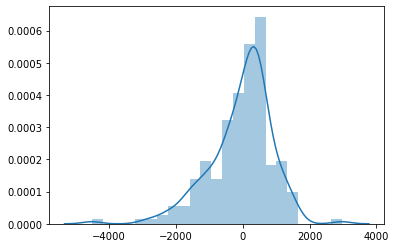

In [75]:
y_test_pred=X_train_sm_5.predict(X_test_sm)
Res=y_test-y_test_pred
sns.distplot(Res)

# Evaluate Test set

In [79]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7642007710122518

Model seems fine as the train R2 score was 80.4 and Test R2 score is 76.4.Hence we can say model is giving best fitted line